In [1]:
cd C:\Users\Tetiana\Desktop\Open_corp_gidno\Graph_vizualization\schema

C:\Users\Tetiana\Desktop\Open_corp_gidno\Graph_vizualization\schema


In [2]:
# ls

In [3]:
from os import listdir
from os.path import isfile, join

import pandas as pd

import yaml
import json

# Parse:

In [4]:
def get_all_yaml_from_dir(path_to_dir):
    onlyfiles = [f for f in listdir(path_to_dir) if isfile(join(path_to_dir, f)) and f.endswith('.yaml')]
    return onlyfiles

def get_node_info(yamel_file, type_of_info):
    with open(yamel_file, 'r',encoding="utf8") as file:
        configuration = yaml.safe_load(file)
    nodename = list(configuration.keys())[0]
    if type_of_info == 'nodename':
        inf = nodename
    elif type_of_info == 'extends':
        inf = configuration[nodename].get('extends')
    elif type_of_info == 'featured':
         inf = configuration[nodename].get('featured')
    return inf

def create_dataframe_with_all_nodes_and_connections_info(path_to_dir):
    list_of_files = get_all_yaml_from_dir(path_to_dir)
    nodename_l = []
    extendse_l = []
    featured_l = []
    df = pd.DataFrame()  
    
    for filee in list_of_files:
        nodename_l.append(get_node_info(filee, 'nodename'))
        extendse_l.append(get_node_info(filee, 'extends'))
        featured_l.append(get_node_info(filee, 'featured'))
        
    df['nodename'] = nodename_l
    df['extends'] = extendse_l
    df['featured'] = featured_l
    
    return df

In [5]:
df_to_graf = create_dataframe_with_all_nodes_and_connections_info('C:\\Users\\Tetiana\\Desktop\\Open_corp_gidno\\Graph_vizualization\\schema')
df_to_graf

,nodename,extends,featured
0,Address,[Interval],"[full, city, street, country]"
1,Airplane,Vehicle,"[type, registrationNumber, country, operator, ..."
2,Analyzable,None,None
3,Article,Document,"[title, author, publishedAt]"
4,Assessment,Thing,"[name, publishDate, author]"
5,Asset,"[Thing, Value]","[name, amount]"
6,Associate,Interval,"[person, associate, relationship]"
7,Audio,Document,"[title, fileName, mimeType, parent]"
8,BankAccount,Asset,"[accountNumber, bankName]"
9,Call,[Interval],"[callerNumber, caller, receiverNumber, receive..."


In [6]:
def get_big_parent_nodes(df):
    l=[]
    for i in range(len(df)):
        if df_to_graf['extends'][i] is None:
            l.append(df['nodename'][i])
    return l

# Visualize:

In [7]:
import graphviz


#Create directed Grapth:

f = graphviz.Digraph('Graph_of_yamel', filename='Graph_of_yamel.gv', engine='dot')

f.attr('node', shape='rectangle',size='5',ranksep="0.5")

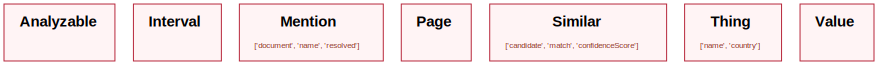

In [8]:
# add big Parent nodes to graph:
for nodes in get_big_parent_nodes(df_to_graf):
    featured = df_to_graf[df_to_graf['nodename']==nodes]['featured'].iloc[0]
    if featured is None:
        featured = ''
    labell =  """<
     <table border="0" cellborder="0" cellspacing="5">
     
     <tr><td align="center"><font color="black" POINT-SIZE="15"><b> """+str(nodes)+"""</b></font></td></tr>
     
     <tr><td align="left"><font color="#8d362a" POINT-SIZE="8"> """+str(featured)+""" </font></td></tr>

     
   </table>>"""
    f.node(nodes,label = labell, color='#b7273b',style='filled', fillcolor='#fff4f5', 
           fontname="Arial",shape='rectangle', size = '9')

f

In [9]:
# add all other nodes to graph:
other_nodes_list = list(set(list(df_to_graf['nodename'])) - set(get_big_parent_nodes(df_to_graf)))

for nodes in other_nodes_list:
    
    featured = df_to_graf[df_to_graf['nodename']==nodes]['featured'].iloc[0]
    if featured is None:
        featured = ''
    labell =  """<
     <table border="0" cellborder="0" cellspacing="5">
     
     <tr><td align="center"><font color="darkgreen" POINT-SIZE="9"><b> """+str(nodes)+"""</b></font></td></tr>
     
     <tr><td align="left"><font color="#8d362a" POINT-SIZE="8"> """+str(featured)+""" </font></td></tr>

     
   </table>>"""
    
    f.node(nodes,label = labell, color='#b7273b',style='filled', fillcolor='#fff4f5', 
           fontname="Arial",shape='rectangle', size = '3')


In [10]:
f

In [11]:
def create_conncetions_between_nodes(df):
    for nodes in other_nodes_list:
        connections_lst = pd.DataFrame(df[df_to_graf['nodename']==nodes]['extends']).reset_index(drop=True)['extends'].loc[0]
        if isinstance(connections_lst, str) is True:
            f.edge(connections_lst,nodes,style='solid', label="      ")
        elif isinstance(connections_lst, str) is False:
            for parents in connections_lst:
                f.edge(parents,nodes,label="         ")

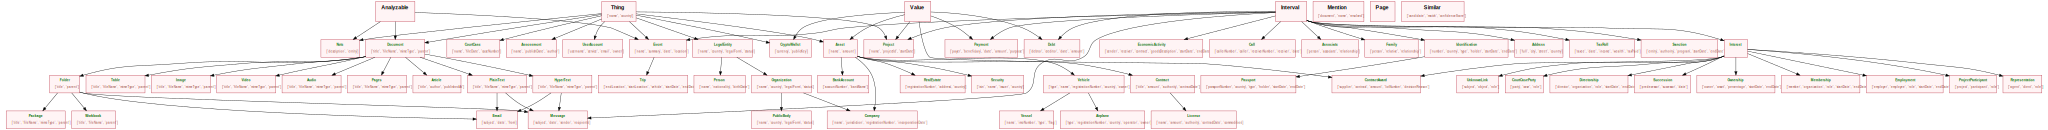

In [12]:
create_conncetions_between_nodes(df_to_graf)
f

In [13]:
f.view()

'Graph_of_yamel.gv.pdf'